# Data used from kaggle 
https://www.kaggle.com/datasets/giripujar/hr-analytics

In [40]:
import pandas as pd
import matplotlib as mlp
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis(EDA)

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [13]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [15]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

__Average all factors based on column left__

In [16]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From this above result we can say that,

1. __Satisfaction level__ of employees is seen changing when retained and those who left
2. __Monthly hours__ are also less of those who left compared to retained employees
3. Retained employees got more __promotions__ compared to retained employees

__Impact of salary on employee retention__

<AxesSubplot:xlabel='salary', ylabel='number_of_employee_left'>

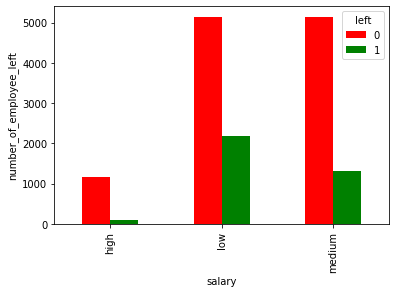

In [22]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar', color = ['red','green'], ylabel = 'number_of_employee_left')

Above chart shows, people with high salaries are less likely to leave the company

__Department wise employee retention stats__

<AxesSubplot:xlabel='Department', ylabel='number_of_employee_left'>

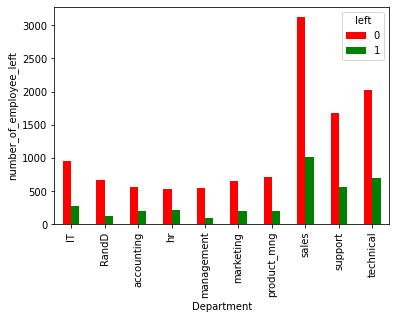

In [23]:
pd.crosstab(df.Department,df.left).plot(kind = 'bar', color = ['red','green'], ylabel = 'number_of_employee_left')

There is no major impact on retention of employees based on departments, this column can be ignored

__Conclusion of EDA__
We can take into consideration the following factors and others can be ignored,
1. Satisfaction level
2. Average monthly salary
3. Promotion in last 5 years
4. Salary

In [26]:
sub_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


__Dealing with values in Salary__

Salary has categorical data which need to be converted to numbers.  
It can be done by using dummy variables.

In [28]:
salary_dummies = pd.get_dummies(sub_df.salary, prefix = 'salary')

In [29]:
dummy_df = pd.concat([sub_df,salary_dummies],axis = 'columns')

In [30]:
dummy_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to drop the salary column

In [31]:
dummy_df.drop('salary',axis = 'columns',inplace = True)
dummy_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


__Now, we will divide the dataframe into X and y for training and testing the model__

In [32]:
X = dummy_df
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [33]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

__Using the library Sklearn we will import and use logistic regression for our model__

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

__Calculate Accuracy of Model__

In [39]:
model.score(X_test,y_test)

0.7806666666666666